In [1]:
import pandas as pd                      # For data handling
import numpy as np                       # For numerical operations
import matplotlib.pyplot as plt          # For plotting
import seaborn as sns                    # For advanced visualizations
from sklearn.preprocessing import StandardScaler  # For standardization

# Aesthetic settings for plots
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

print(" Libraries imported successfully!")

 Libraries imported successfully!


In [3]:
df=pd.read_csv('discounts.csv')

In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [5]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB
None


In [6]:
print(df.isnull().sum())

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64


In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Columns:", numerical_cols)


Numerical Columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


In [8]:
#  Aggregations that work together
basic_stats = df[numerical_cols].agg(['mean', 'median', 'std']).transpose()

# Handle mode separately (can return multiple values per column)
modes = df[numerical_cols].mode().transpose()

#  Combine (show only the first mode value for simplicity)
basic_stats['mode'] = modes[0]


basic_stats


,mean,median,std,mode
Volume,5.066667,4.000000,4.231602,3.000000
Avg Price,10453.433333,1450.000000,18079.904840,400.000000
Total Sales Value,33812.835556,5700.000000,50535.074173,24300.000000
Discount Rate (%),15.155242,16.577766,4.220602,5.007822
Discount Amount,3346.499424,988.933733,4509.902963,69.177942
Net Sales Value,30466.336131,4677.788059,46358.656624,326.974801


In [9]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [11]:
df[numerical_cols].corr()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Volume,1.000000,-0.250878,-0.034789,0.157972,0.066297,-0.044373
Avg Price,-0.250878,1.000000,0.831978,-0.831582,0.676007,0.841166
Total Sales Value,-0.034789,0.831978,1.000000,-0.835431,0.932410,0.999382
Discount Rate (%),0.157972,-0.831582,-0.835431,1.000000,-0.657607,-0.846720
Discount Amount,0.066297,0.676007,0.932410,-0.657607,1.000000,0.919127
Net Sales Value,-0.044373,0.841166,0.999382,-0.846720,0.919127,1.000000


# Visualization

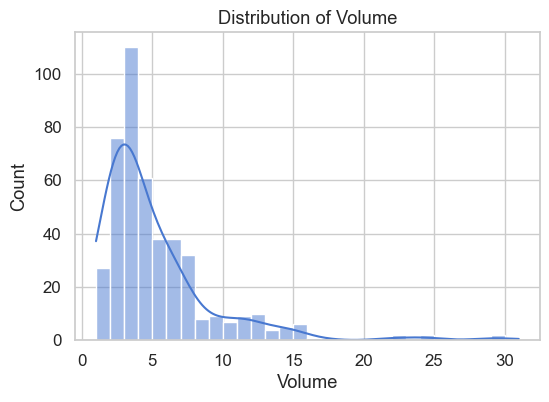

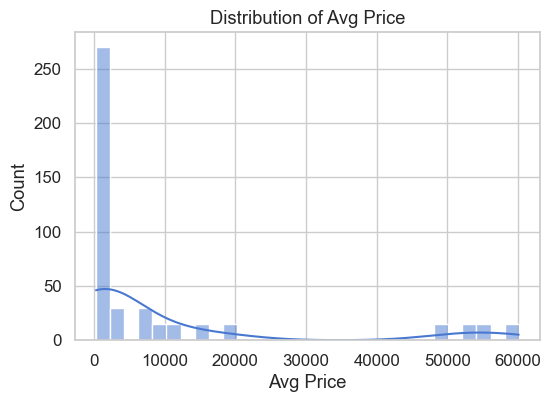

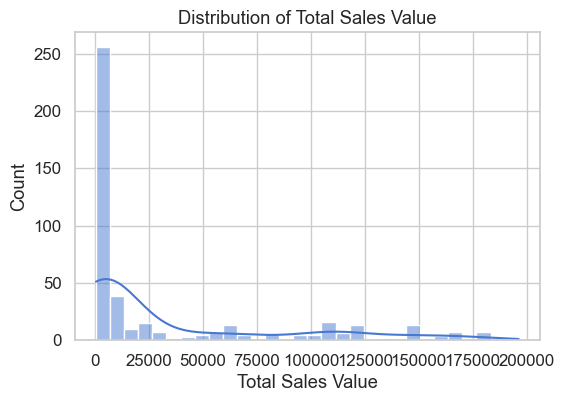

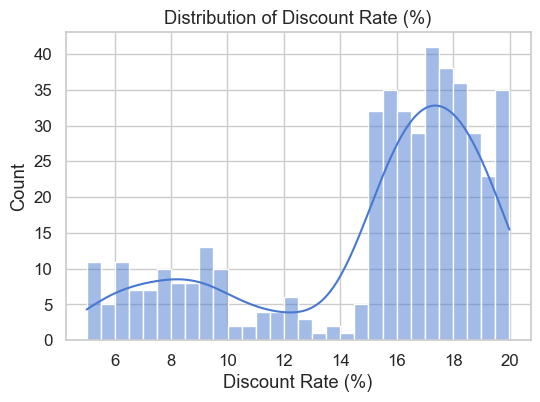

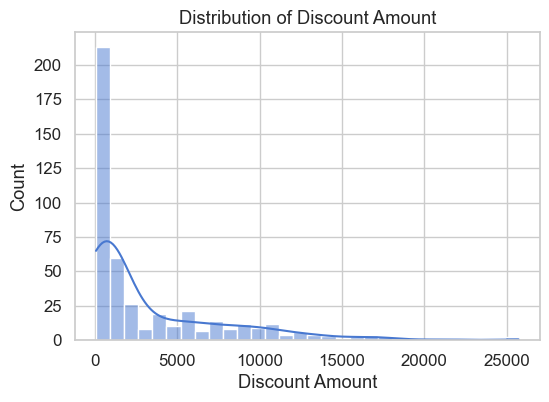

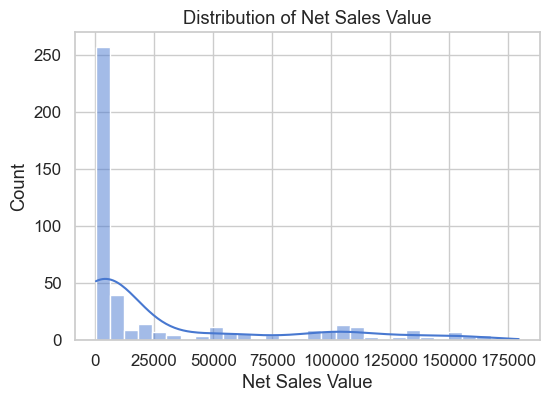

In [15]:
#histogram
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col],kde=True,  bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


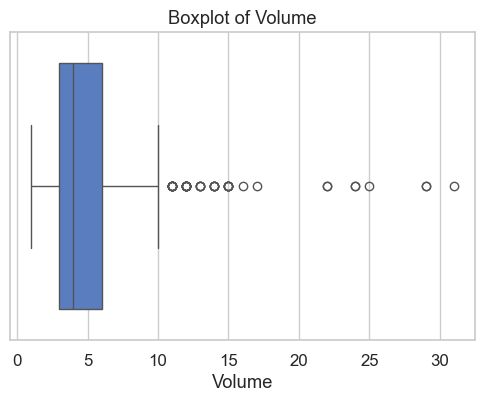

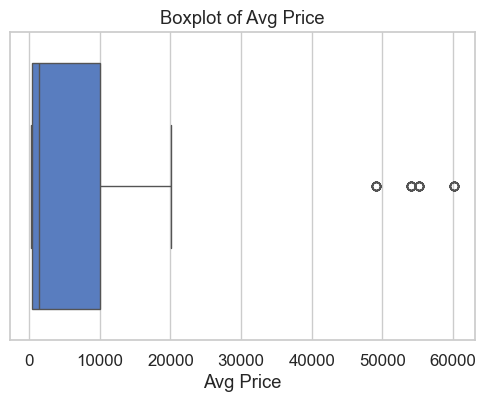

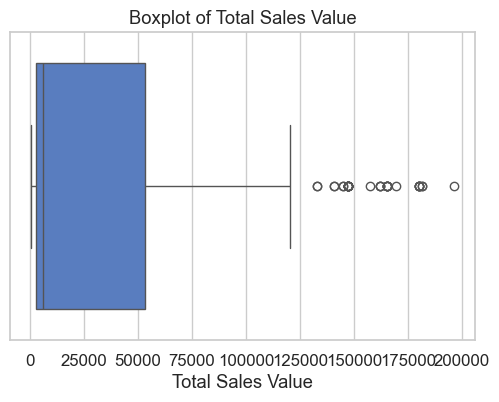

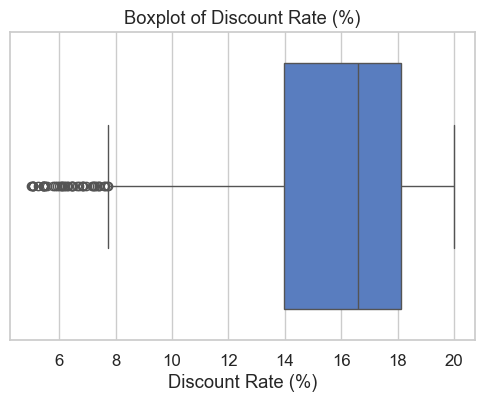

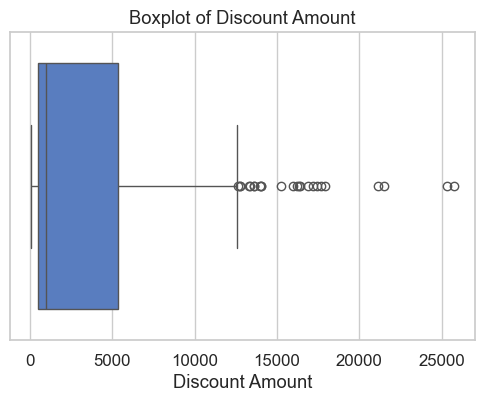

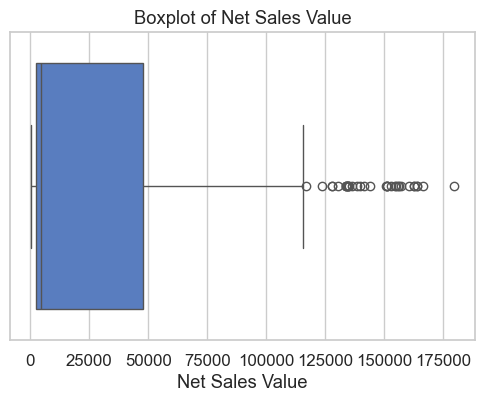

In [13]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Bar Chart Analysis for Categorical Columns

In [16]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


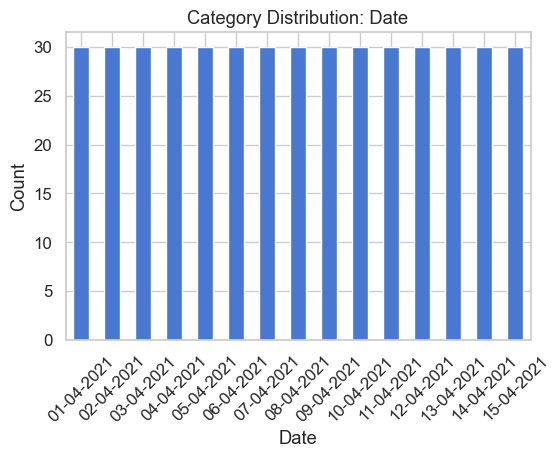

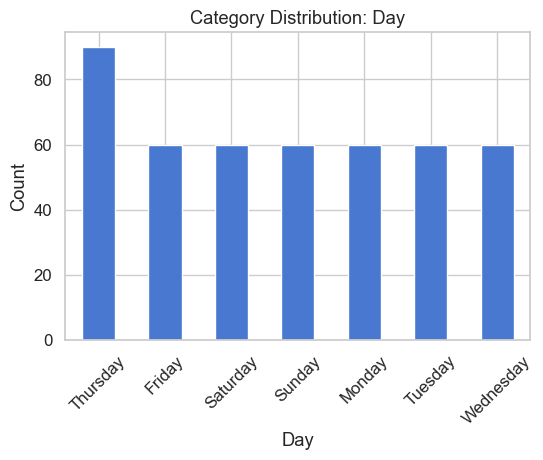

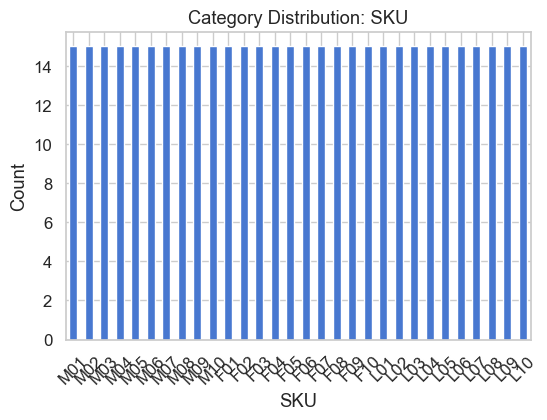

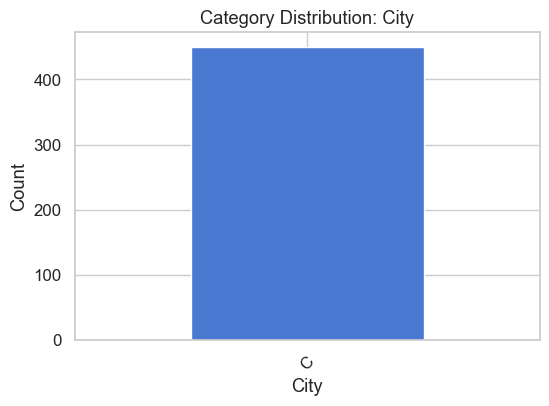

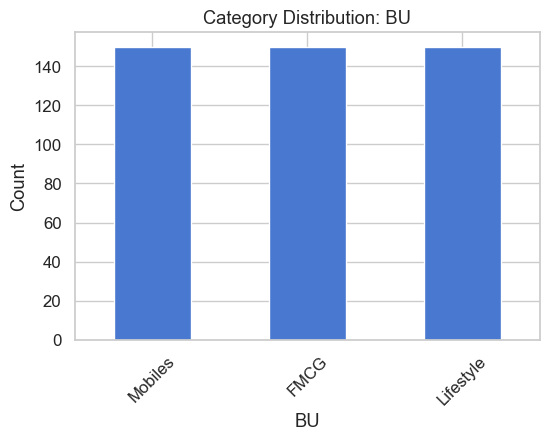

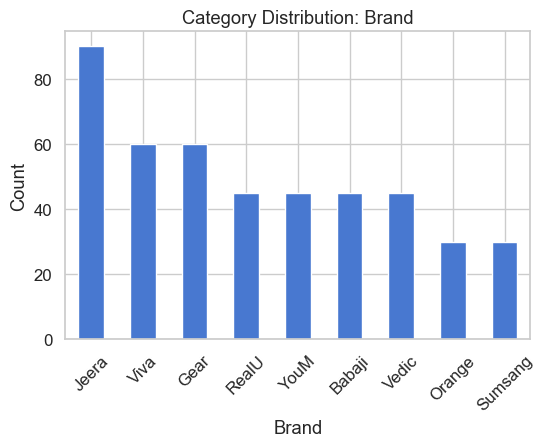

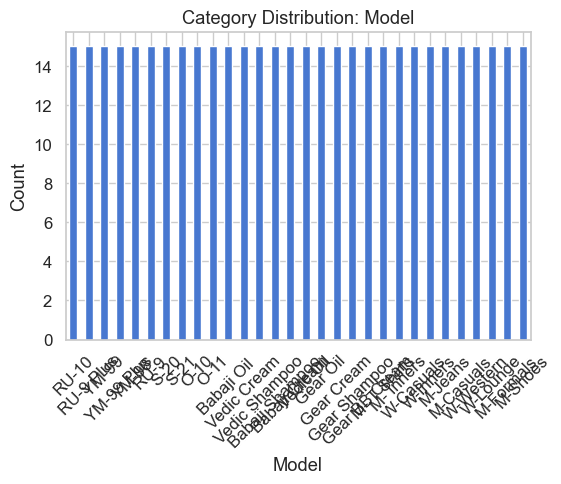

In [17]:
# bar chart
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Category Distribution: {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

Standardization of Numerical Variables


In [19]:

scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [20]:
# Before standardization
df[numerical_cols].describe()

# After standardization
df_standardized[numerical_cols].describe()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


One Hot Encoding


In [21]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded.head()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
